# Q2-c

In [1]:
%matplotlib inline
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

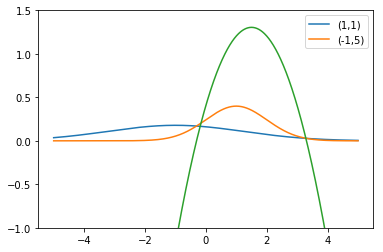

In [2]:
x=np.linspace(-5,5, 1000)
norm0 = norm.pdf(x,1,1)
norm1 = norm.pdf(x,-1,np.sqrt(5))
classifier=-0.4*x**2+1.2*x+0.4047
plt.figure()
plt.plot(x, norm1, label='(1,1)')
plt.plot(x, norm0, label='(-1,5)')
plt.legend()
plt.ylim(-1,1.5)
plt.plot(x, classifier)

# Q3 -Part a &b (euclidean distance)

Centroid for 2 clusters using Euclidean distance:
[(243, 235, 224), (64, 55, 56)]


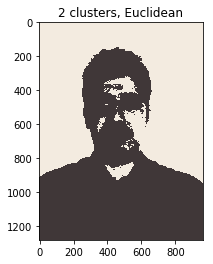

Centroid for 4 clusters using Euclidean distance:
[(25, 26, 34), (248, 242, 232), (75, 69, 70), (168, 126, 108)]


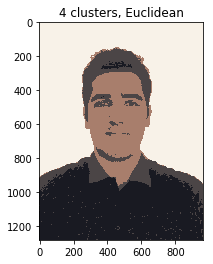

Centroid for 8 clusters using Euclidean distance:
[(21, 22, 28), (36, 37, 46), (70, 67, 69), (221, 215, 206), (253, 249, 240), (129, 101, 88), (178, 133, 113), (246, 240, 226)]


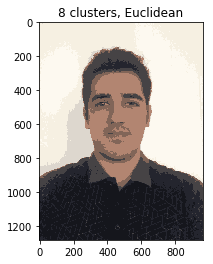

Centroid for 16 clusters using Euclidean distance:
[(252, 245, 234), (27, 28, 37), (124, 97, 85), (17, 18, 24), (59, 57, 60), (254, 252, 246), (246, 239, 224), (81, 76, 77), (38, 39, 48), (21, 22, 28), (230, 224, 215), (13, 15, 18), (158, 118, 100), (186, 139, 118), (215, 209, 201)]


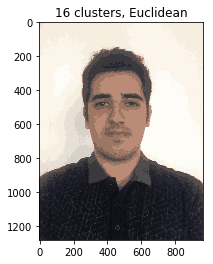

In [3]:
from PIL import Image, ImageStat
img = "Masoud.jpg"
im = Image.open(img)
img_width, img_height = im.size
px = im.load()


def Kmeans(X):
    centroids = []
    old_centroids = []
    rgb_range = ImageStat.Stat(im).extrema
    
    
    for k in range(0, X):
        cent = px[np.random.randint(0, img_width), np.random.randint(0, img_height)]
        centroids.append(cent)
        
    for i in range (15):
        
        old_centroids = centroids 
        
        clusters = {}

        for x in range(0, img_width):
            for y in range(0, img_height):
                p = px[x, y]

                minDist = 1000000
                minIndex = 0

                for i in range(0, len(centroids)):
                    d= np.sqrt(int((centroids[i][0] - p[0]))**2 + int((centroids[i][1] - p[1]))**2 + int((centroids[i][2] - p[2]))**2)
                    if d < minDist:
                        minDist = d
                        minIndex = i


                try:
                    clusters[minIndex].append(p)
                except KeyError:
                    clusters[minIndex] = [p]
        
        
        new_centroids = []
        keys = sorted(clusters.keys())
    
        for k in keys:
            n = np.mean(clusters[k], axis=0)
            new = (int(n[0]), int(n[1]), int(n[2]))
            new_centroids.append(new)

        centroids=new_centroids
        
        

    return centroids

def imagshow(centroid,k):
    img = Image.new('RGB', (img_width, img_height), "white")
    p = img.load()

    for x in range(img.size[0]):
        for y in range(img.size[1]):
            minDist = 9999
            minIndex = 0
            pp = px[x, y]
            for i in range(0, len(centroid)):
                d= np.sqrt(int((centroid[i][0] - pp[0]))**2 + int((centroid[i][1] - pp[1]))**2 + int((centroid[i][2] - pp[2]))**2)
                if d < minDist:
                    minDist = d
                    minIndex = i
            RGB_value = centroid[minIndex]
            p[x, y] = RGB_value

    
    img.save('Masoud'+str(k)+'b'+'.jpg')
    plt.imshow(img)
    plt.title(str(k)+' clusters, Euclidean')
    plt.show()


k_input=np.array([2, 4, 8, 16])
for k in k_input:
    
    result = Kmeans(k)
    print('Centroid for '+str(k)+' clusters using Euclidean distance:')
    print(result)
    imagshow(result,k)

Centroid for 2 clusters using Absolute:
[(244, 236, 225), (65, 56, 56)]


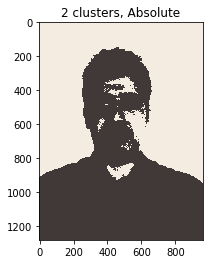

Centroid for 4 clusters using Absolute:
[(223, 217, 208), (251, 245, 234), (156, 119, 103), (35, 35, 41)]


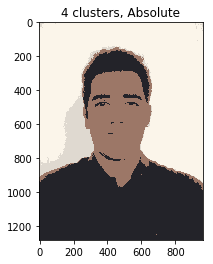

Centroid for 8 clusters using Absolute:
[(19, 20, 26), (69, 65, 68), (124, 98, 88), (178, 133, 114), (26, 27, 34), (13, 15, 20), (40, 40, 48), (248, 242, 232)]


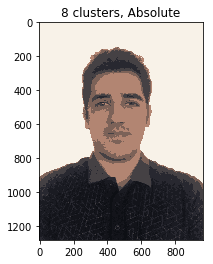

Centroid for 16 clusters using Absolute:
[(22, 23, 30), (254, 253, 248), (243, 237, 222), (82, 75, 75), (181, 134, 114), (52, 51, 56), (233, 227, 217), (140, 106, 92), (248, 241, 226), (220, 215, 206), (252, 244, 232), (31, 32, 42), (253, 248, 239), (193, 182, 173), (17, 18, 23), (12, 14, 18)]


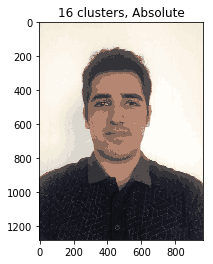

In [4]:
def Kmeans(X):
    centroids = []
    old_centroids = []
    rgb_range = ImageStat.Stat(im).extrema
    
    
    for k in range(0, X):
        cent = px[np.random.randint(0, img_width), np.random.randint(0, img_height)]
        centroids.append(cent)
        
    for i in range (15):
        
        old_centroids = centroids 
        
        clusters = {}

        for x in range(0, img_width):
            for y in range(0, img_height):
                p = px[x, y]

                minDist = 1000000
                minIndex = 0

                for i in range(0, len(centroids)):
                    d = np.absolute(int((centroids[i][0] - p[0]))) + np.absolute(int((centroids[i][1] - p[1]))) + np.absolute(int((centroids[i][2] - p[2])))
                    if d < minDist:
                        minDist = d
                        minIndex = i


                try:
                    clusters[minIndex].append(p)
                except KeyError:
                    clusters[minIndex] = [p]
        
        
        new_centroids = []
        keys = sorted(clusters.keys())
    
        for k in keys:
            n = np.mean(clusters[k], axis=0)
            new = (int(n[0]), int(n[1]), int(n[2]))
            new_centroids.append(new)

        centroids=new_centroids
        
        

    return centroids

def imagshow(centroid,k):
    img = Image.new('RGB', (img_width, img_height), "white")
    p = img.load()

    for x in range(img.size[0]):
        for y in range(img.size[1]):
            minDist = 9999
            minIndex = 0
            pp = px[x, y]
            for i in range(0, len(centroid)):
                d = np.absolute(int((centroid[i][0] - pp[0]))) + np.absolute(int((centroid[i][1] - pp[1]))) + np.absolute(int((centroid[i][2] - pp[2])))
                if d < minDist:
                    minDist = d
                    minIndex = i
            RGB_value = centroid[minIndex]
            p[x, y] = RGB_value

    
    img.save('Masoud'+str(k)+'c'+'.jpg')
    plt.imshow(img)
    plt.title(str(k)+' clusters, Absolute')
    plt.show()

# results of part (c)
k_input=np.array([2, 4, 8, 16])
for k in k_input:
    
    result = Kmeans(k)
    print('Centroid for '+str(k)+' clusters using Absolute:')
    print(result)
    imagshow(result,k)

# Q 4

In [53]:
import os
import cv2
import sys
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
fig_num = 40                                                            
train_fig_num = 6                                                       
test_fig_num = 4                                                       
l = train_fig_num * fig_num                                        
m = 92                                                                      
n = 112                                                                     
mn = m * n 
training_ids = []  
L = np.empty(shape=(mn, l), dtype='float64')

cur_img = 0
for face_id in range(1, fig_num+1):
    
    training_idss = random.sample(range(1, 11), train_fig_num)  
    training_ids.append(training_idss)                             
    for training_id in training_idss:
        path_to_img = os.path.join('att_faces','s' + str(face_id), str(training_id) + '.pgm')          
        img = cv2.imread(path_to_img, 0)                                
        img_col = np.array(img, dtype='float64').flatten()              
        L[:, cur_img] = img_col[:]                                     
        cur_img += 1
mean_img_col = np.sum(L, axis=1) / l 

for j in range(0, l):                                             
    L[:, j] -= mean_img_col[:]

C = np.matrix(L.transpose()) * np.matrix(L)                             
C /= l
eval, evectors = np.linalg.eig(C) 
sort_indices = eval.argsort()[::-1]                            
eval = eval[sort_indices]                              
evectors = evectors[sort_indices]


# Plotting captured energy versus number of components

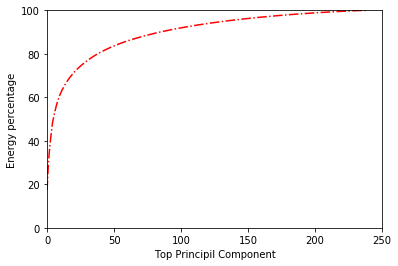

In [54]:
eval_sum = sum(eval[:])                                     
eval_count = 0                                                      
eval_energy = 0.0
cu_energy=[]
for evalue in eval:
    eval_energy += evalue / eval_sum
    cu_energy.append(eval_energy*100)
    eval_count += 1
    
cu_energy[24]
plt.plot(cu_energy, '-.r')
plt.xlabel('Top Principil Component')
plt.ylabel('Energy percentage')
plt.ylim(0,100)
plt.xlim(0,250)
plt.show()

# Required component for 50% energy

In [56]:
eval_sum = sum(eval[:])                                      
eval_count = 0                                                       
eval_energy = 0.0
cu_energy=[]
for evalue in eval:
    eval_energy += evalue / eval_sum
    cu_energy.append(eval_energy)
    eval_count += 1
    if eval_energy >= 0.5:
        break
print(str(eval_count)+' components are needed for having 50% energy')

6 components are needed for having 50% energy


# Captured energy with 25 components

In [57]:
eval_sum = sum(eval[:])                                     
eval_count = 0                                                      
eval_energy = 0.0
cu_energy=[]
for evalue in eval:
    eval_energy += evalue / eval_sum
    cu_energy.append(eval_energy)
    eval_count += 1
    if eval_count==25:
        break
print('25 top components lead to '+str(eval_energy*100)+'% energy')

25 top components lead to 73.86889498584289% energy


# Q4-Part b

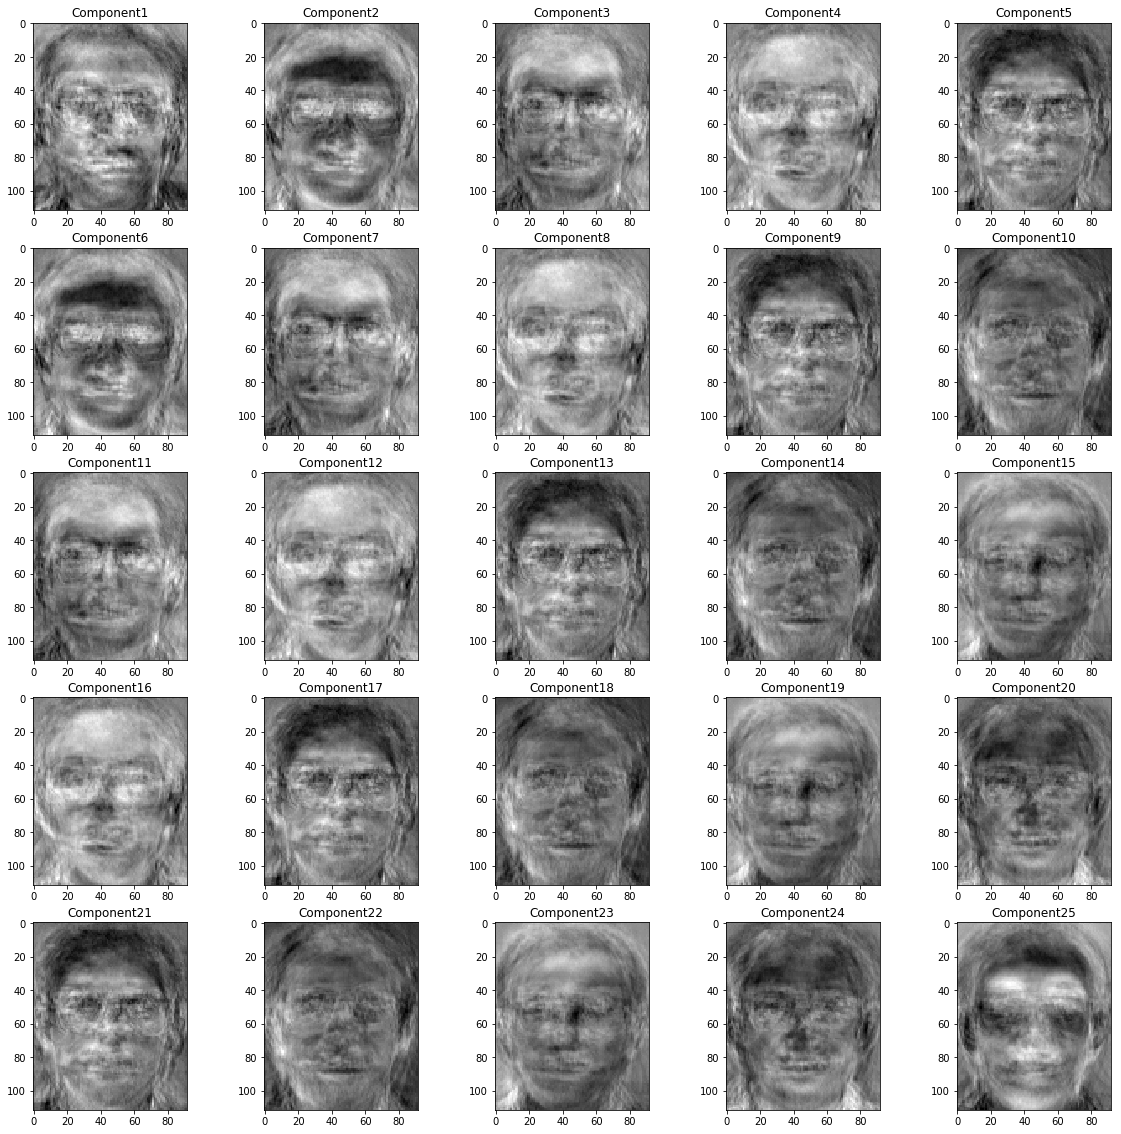

In [58]:
eval = eval[0:eval_count]                           
evectors = evectors[0:eval_count]
evectors = evectors.transpose()                               
evectors = L * evectors                                      
norms = np.linalg.norm(evectors, axis=0)                
evectors = evectors / norms                                   
W = evectors.transpose() * L   
f, axarr = plt.subplots(5,5,figsize=(20,20))
for j in range (5):
    for i in range (5):
        axarr[j, i].imshow(evectors[:,j+i].reshape((112,92)), cmap='gray')
        axarr[j, i].set_title('Component'+ str((i+1)+5*(j)))
plt.show()

# Q4-part c, for test faces

In [67]:
test_count = test_fig_num * fig_num                  
test_correct = 0
for face_id in range(1, fig_num + 1):
    for test_id in range(1, 11):
        if (test_id in training_ids[face_id-1]) == False:         
            path_to_img = os.path.join('att_faces','s' + str(face_id), str(test_id) + '.pgm')       
            
            img = cv2.imread(path_to_img, 0)                                        
            img_col = np.array(img, dtype='float64').flatten()                     
            img_col -= mean_img_col                                            
            img_col = np.reshape(img_col, (mn, 1))                             

            S = evectors.transpose() * img_col                                 
                                                                               
            diff = W - S                                                       
            norms = np. linalg.norm(diff, axis=0)

            closest_face_id = np.argmin(norms)                                      
            result_id=(closest_face_id / train_fig_num) + 1  
            
            result = (result_id == face_id)

            if result == True:
                test_correct += 1
            else:
                print('Image %s was wrongly classified as image in group %2d\n\n' %(path_to_img, result_id))

accuracy = float(100. * test_correct / test_count)
print( 'Accuracy= ' + str(accuracy) + '%')



Image att_faces\s1\3.pgm was wrongly classified as image in group 32


Image att_faces\s1\7.pgm was wrongly classified as image in group  1


Image att_faces\s1\9.pgm was wrongly classified as image in group  1


Image att_faces\s2\2.pgm was wrongly classified as image in group  2


Image att_faces\s2\3.pgm was wrongly classified as image in group  2


Image att_faces\s2\6.pgm was wrongly classified as image in group  2


Image att_faces\s2\7.pgm was wrongly classified as image in group  2


Image att_faces\s3\2.pgm was wrongly classified as image in group  3


Image att_faces\s3\3.pgm was wrongly classified as image in group  3


Image att_faces\s3\6.pgm was wrongly classified as image in group  3


Image att_faces\s3\8.pgm was wrongly classified as image in group  3


Image att_faces\s4\4.pgm was wrongly classified as image in group  4


Image att_faces\s4\5.pgm was wrongly classified as image in group  4


Image att_faces\s4\8.pgm was wrongly classified as image in group  4


Image 